# IMPORTANT

Th ere was a typo in the part that reads the parquets, S82 parquets were read in instead of TRILEGAL pixels, so the priors can't be valid! Right? I've re-generated priors by loading the entire HiPSCat TRILEGAL, box-searched to S82. 

In [1]:
%matplotlib inline

import hipscat
import hipscat_import
import pandas as pd
import multiprocessing as mp
import glob
from tqdm import tqdm
import os.path
import numpy as np
import healpy as hp
import glob

pd.set_option('display.max_columns', None)

In [8]:
import hipscat_import.pipeline as runner
from hipscat_import.catalog.arguments import ImportArguments
from hipscat_import.catalog.file_readers import ParquetReader

# in_file_paths = glob.glob("/mnt/beegfs/scratch/data/S82_standards/S82_hipscat/*/*/*parquet")
in_file_paths = glob.glob("/mnt/beegfs/scratch/data/TRILEGAL_parquet//S82_hipscat/*/*/*parquet")
print(f"Input files: {len(in_file_paths)}")
#in_file_paths = glob.glob("outputs/trilegal-00000*.parquet")
in_file_paths.sort()
args = ImportArguments(
    output_artifact_name="trilegal_S82_32",
    output_path="/home/lovro/scratch/data/TRILEGAL_S82_fixed_hpixorder_32",
    input_file_list=in_file_paths,
    file_reader="parquet", #ParquetReader""(),
    ra_column="ra",
    dec_column="dec",
    constant_healpix_order=5,
    # overwrite=True, # Gone in 0.3.1?
    catalog_type="object",
    sort_columns="ra",
    dask_n_workers=96,
    dask_tmp="/nvme/tmp/dask_tmp",
    tmp_dir="/nvme/tmp/tmp_dir",
    resume=False,
    # pixel_threshold=5_000_000,
    add_hipscat_index=True    
)
runner.pipeline(args)

Input files: 28


Planning  : 100%|█████████████████████████████████████████████████████████| 5/5 [01:03<00:00, 12.76s/it]
/nvme/lovro/miniconda3/envs/photoD-dev/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43061 instead
  warnings.warn(
Finishing : 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.39it/s]
2024-10-10 17:10:49,160 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photoD-dev/lib/python3.12/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call

2024-10-10 17:14:50,893 - distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:44336 remote=tcp://127.0.0.1:45253>
Exception ignored in: <function Client.__del__ at 0x7f0c88de7600>
Traceback (most recent call last):
  File "/nvme/lovro/miniconda3/envs/photoD-dev/lib/python3.12/site-packages/distributed/client.py", line 1523, in __del__
    self.close()
  File "/nvme/lovro/miniconda3/envs/photoD-dev/lib/python3.12/site-packages/distributed/client.py", line 1775, in close
    sync(self.loop, self._close, fast=True, callback_timeout=timeout)
  File "/nvme/lovro/miniconda3/envs/photoD-dev/lib/python3.12/site-packages/distributed/utils.py", line 428, in sync
    raise TimeoutError(f"timed out after {timeout} s.")
TimeoutError: timed out after 60 s.


CPU times: user 20 s, sys: 12 s, total: 32 s
Wall time: 1min


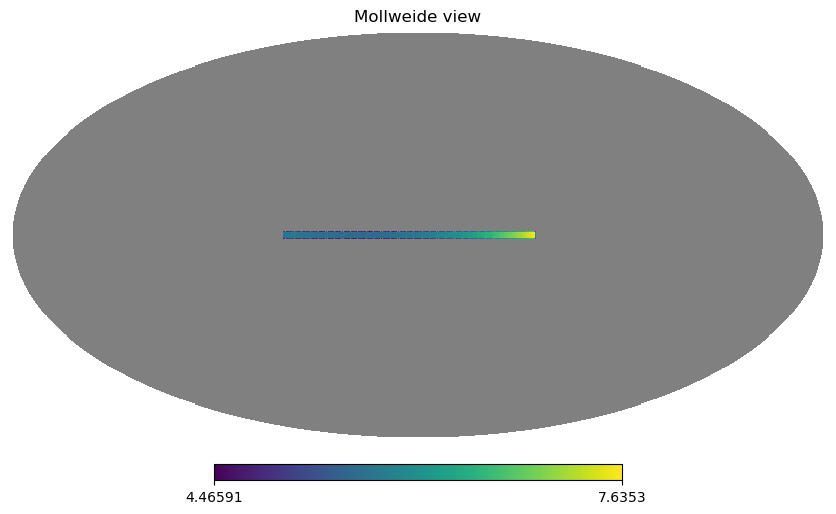

In [11]:
%%time
import lsdb
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch
tril_fn = "/home/lovro/scratch/data/TRILEGAL_S82_fixed_hpixorder_32/trilegal_S82_32/"
tril = lsdb.read_hipscat(tril_fn) #, search_filter=BoxSearch(ra=(-52, 60), dec=(-1.266, 1.266)))
tril.skymap(lambda df, a: np.log(len(df)+1), order=9)

In [13]:
tril.hc_structure.catalog_info.total_rows

10545280